<a href="https://colab.research.google.com/github/andreeo/computer-vision/blob/main/mathematical_operations_on_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mathematical Operations on Images

In this section we will learn  how to change the brightness and contrast of an image. Also learn about data type conversion.

Now when we read an image it is usually a 24-bit image which means that there are eight bits per color. The pixel values go from 0 to 255 but there are many image transformations where the pixel values go negative or even above 255 and in such cases the 8-bit representation is inadequate because it's going to clip the values between 0 and 255. Anything below 0 get clipped to 0, anything above 255 gets clipped to 255 so we need to be very sure which kind of data type we  are working with. So for negative values, for example, it is a good idea to work with floating points and if you have very large numbers, we can also go  for 16-bit representation. So this is a cause of a lot of headache and a lot of bugs. Whenever you are implementing a complex vision algorithm make sure that  the data type is correct at very stage of the algorithm.



#Import libraries

In [1]:
#import libraries
import cv2
import numpy as np
import matplotlib.pyplot  as plt
%matplotlib inline

#Import data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

!unzip -qq drive/MyDrive/opencv-data/week1_python.zip  -d  /content/week1_python

Mounted at /content/drive
mapname:  conversion of  failed


In [12]:
imagePath =  "/content/week1_python/data/images"

#Datatype Conversion

Before we get into any mathematical operations. It is very important to understand the data types used and how to convert from one to another.

As we know, an image is represented as a numpy array once it's read using cv2.**imread** function. The default datatype of this object is unsigned integer (8-bits). For most Arithmetic operations like multiplication or division, we need to convert the array type to floating wich each pixel having 16, 32 or 64 bits of data. This help prevent overflow while working with the images.

Most of the time we don't need to work using float64 and float32 is enough for most image processing operations (even float16)




In [50]:
#read image
image = cv2.imread(imagePath + "/boy.jpg")

In [51]:
scalingFactor = 1/255.0

# Convert unsigned int to float
image = np.float32(image)
# Scale the values so that they lie  between [0,1]
image = image * scalingFactor

The scale or the scaling factor reduces the range of 0-255 to 0-1, hence all the floating point numbers now range 0-1. When we convert back to unsigned integer we use the reciprocal of the scaling factor and the range is converted from 0-1 to 0-255.

In [55]:
#Convert back to unsigned int
image =  image * (1.0/scalingFactor)
image =  np.uint8(image)

#Contrast Enhancement

Many definitions of contrast exist in literature. Without going into the gory details, roughly speaking **it is the difference in intensity between the brightest and darkest regions of a given image**. Higher the difference, higher is the contrast. The maximum contrast is also known as **Dynamic Range**. In an image with good contrast, objects are easily discernible.

On of the easiest ways to improve contrast of an image is *Intensity Scaling*

In this approach, a scale factor (α) is multiplied with intensity values of all pixels. Given below is the code snipped to do the same. Intensity scaling is represented by following equation.

\begin{align}
Ι_o= αΙ
    \end{align}



#Code for Contrast Enhacement

In the code below, we will apply the above mentioned formulas to get contrast enhacement images.

We will increase the contrast by 30%.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


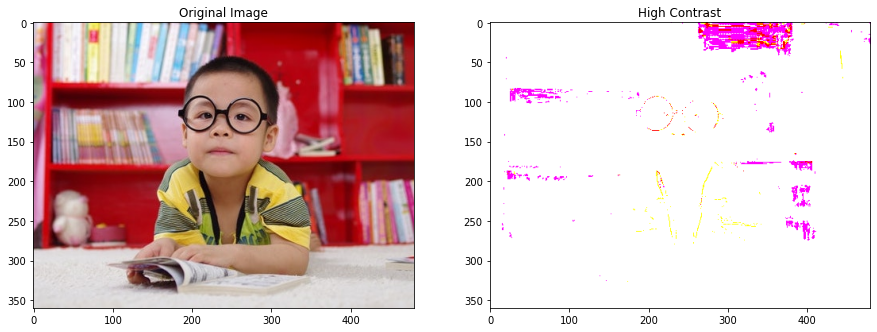

In [56]:
contrastPercentage = 30.0

#multiple with scaling factor to increase contrast

contrastHight =  (1+contrastPercentage/100) * image

#display output
plt.figure(figsize=[15,15]);

plt.subplot(121);
plt.imshow(image[...,::-1]);
plt.title("Original Image");

plt.subplot(122);
plt.imshow(contrastHight[...,::-1]);
plt.title("High Contrast");


## What's wrong?

Why did these simple operations such undesirable results? To answer that, let us  do a quick check of the image properties.

In [59]:
print("Original Image Datatype : {}".format(image.dtype))
print("Contrast Image Datatype : {}".format(contrastHight.dtype))

print("Original Image Highest Pixel Intensity: {}".format(image.max()))
print("Original Image Highest Pixel Intensity: {}".format(contrastHight.max()))

Original Image Datatype : uint8
Contrast Image Datatype : float64
Original Image Highest Pixel Intensity: 255
Original Image Highest Pixel Intensity: 331.5


## Issue with Contrast Enhancement code

The white display in case of contrastHigh is more of a display issue. Display functions expect the images to be in either of these 2 formats.

1. If the image is in float datatype, then the range should be [0,1]. Anything above 255 is considered as white.
2. If the image is in int datatype, then the range should be [0,255].


##Solution

We can see that the datatype of constrastHigh is float and the max value is 331.5. This means that in order to get rid of this display problem, we can consider the above 2 points and make the image conform to any of the valid formats. So,  to ged rid of the problem, we can do the following.

1. **Clip** the intensity values to **0 ~ 255** and change data type to uint 8
2. If you want to keep the image in float format, then **Normalize** the intensity values so  that  it lies in **[0,1]**

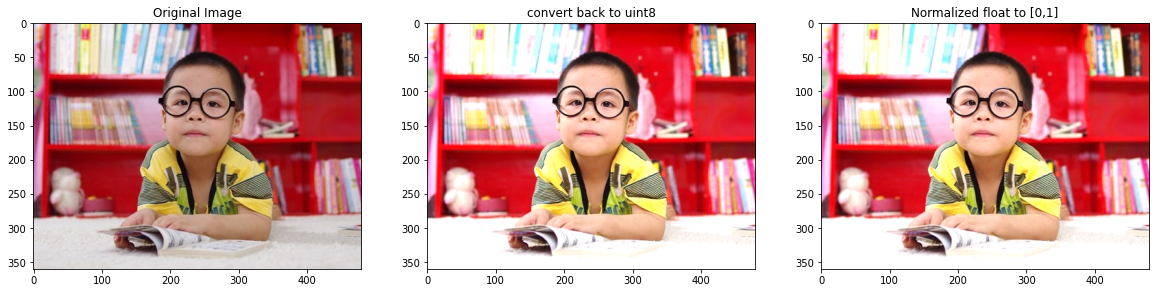

In [67]:
contrastPercentage = 30

#clip the values to 0 ~ 255 and change it  back to uint8 for display
contrastImage = (1+contrastPercentage/100) * image
clippedContrastImage = np.clip(contrastImage, 0, 255)
contrastHighClippedUint8= np.uint8(clippedContrastImage)

#convert the range to [0,1] and keep it a float format
contrastHightNormalized = ((1+contrastPercentage/100) * image) / 255
contrastHightNormalized01Clipped = np.clip(contrastHightNormalized, 0, 1)


plt.figure(figsize=[20,20])

plt.subplot(131);
plt.imshow(image[...,::-1]);
plt.title("Original Image");

plt.subplot(132);
plt.imshow(contrastHighClippedUint8[...,::-1]);
plt.title("convert back to uint8");

plt.subplot(133);
plt.imshow(contrastHightNormalized01Clipped[...,::-1]);
plt.title("Normalized float to [0,1]");


# Brightness Enhancement

Brightess is measure of light falling on the scene. In RGB color space, it can be thought of as the arithmetic mean of the R, G and B color values. To make an image brigter, the intensity values should be increased by some offset (β) and viceversa.

if Ι is the input image, and Ι$_o$  is the output image, brightness enhanced imageis given by the equation

\begin{align}
Ι_o = Ι + β
    \end{align}




#Code for Brightness Enhancement

We apply above mentioned formulas to get brightness enhanced images.

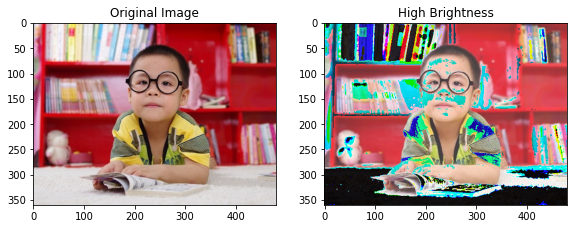

In [70]:
brightnessOffset = 50

#add the offset for increasing brigthess
brightHigh = image + brightnessOffset

#displat the outputs
plt.figure(figsize=[20,20])

plt.subplot(141);
plt.imshow(image[...,::-1]);
plt.title("Original Image");

plt.subplot(142);
plt.imshow(brightHigh[...,::-1]);
plt.title("High Brightness");



## What's wrong?

Why did these simple operations gave such undesireable results? To answer that, let us do a quick check of the image properties.

In [72]:
print("Original Image Datatype : {}".format(image.dtype))
print("Contrast Image Datatype : {}".format(brightHigh.dtype))

print("Original Image Highest Pixel Intensity: {}".format(image.max()))
print("Original Image Highest Pixel Intensity: {}".format(brightHigh.max()))

Original Image Datatype : uint8
Contrast Image Datatype : uint8
Original Image Highest Pixel Intensity: 255
Original Image Highest Pixel Intensity: 255


## Issue with Brigthness Enhancement Code

The highest pixel intensity in the original image is 255. Since we have added 50 to each pixel, the highest pixel intensity in brightHigh image should have been 305. But we can see that the highest pixel intensity is in brightHigh image is 255.

This is happing because of the unit8 datatype. Since the maximum  value that a unsigned 8 bit integer. Since the  maximum  value that a unsigned 8 bit integer can hold is 255, any value greater than that is causing an **overflow**.

This is a much more serious problem  than the display issue we encountered earlier. These kind of bugs go undetected and cause havoc in the final application as they will be difficult to debug also.

Let us take an example to understand what was going on in the above case.



In [73]:
#sample 2x2 matrix  of type uint8
a = np.array([[100,110],
              [120,130]], dtype='uint8')

print(a)

[[100 110]
 [120 130]]


In [79]:
#add 130 so that the last element encounters overflow
print(a+130)

[[230 240]
 [250   4]]


You can see  that the element [1,1] should have been 260. But instead it overflowed and rolled over. There will be a similar problem if we subtrac TRhhere will be a similar problem if we subtract.

Let us see another interesting nuisance.

In [80]:
print(a-130)

[[226 236]
 [246   0]]


In [81]:
print(a + (-130))

[[-30 -20]
 [-10   0]]


In the first case, both operand(a and 130) are uint8 and thus the output is uint8 and hence the underflow.

But in  the second case, the 2nd operand has a type int16. Thus, the final output becomes int16 and thus, doesn't underflow.

This shows a major Pitfall of  using uint8 while dealing with arithmetic operations on images.

Thus, it is important to covert the images to int or float(recommended) data types while doing arithmetic operations(like addition, subtraction, multiplication, etc) on images to avoid undesirable results.

## Solution

In  order to get rid of this problem, we can do the following.

1. Use opencv to handle uint8 arithmetic.
2. We should do all mathematical operations at a high dynamic range by converting the datatype of the operands to higher order integers or float, whichever is applicable.

We will see how to get the resolve these issues and get the correct outputs.


## Solution 1: Use opencv functions


In [82]:
print(cv2.add(a,130))

[[230 240]
 [250 255]]


Clipping

## Solution 2-a: Convert to int32/int64

You should convert to higher integer types to avoid overflow and underflow situations. Perform clipping if necessary and bring it back to uint8 in the  final stage as that is what the display functions expect.


In [85]:
a_int32  = np.int32(a)
b = a_int32+130
print(b)

[[230 240]
 [250 260]]


In [87]:
print(b.clip(0,255))
b_uint8 = np.uint(b)
b_uint8

[[230 240]
 [250 255]]


array([[230, 240],
       [250, 260]], dtype=uint64)

You can do the same with float  datatype as well

## Solution 2-b: Convert to float32/float64

It is a good practice to convert the uint8 to float and normalize the range to [0,1] and change it back to [0,255] after doing all arithmetic operations.

In [90]:
a_float32 = np.float32(a)/255
b = a_float32 + 130/255
print(b)

[[0.90196085 0.94117653]
 [0.9803922  1.0196079 ]]


In [94]:
c = b*255
print("Output = \n{}".format(c))
print("Clipped output = \n{}".format(c.clip(0,255)))
b_uint8 = np.uint8(c.clip(0,255))
print("uint8 output = \n{}".format(b_uint8))

Output = 
[[230.00002 240.00002]
 [250.00002 260.     ]]
Clipped output = 
[[230.00002 240.00002]
 [250.00002 255.     ]]
uint8 output = 
[[230 240]
 [250 255]]


## Final Solution

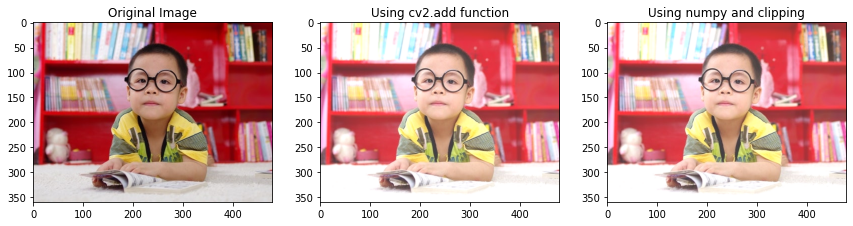

In [97]:
#add the offset for increasing brightness
brightHighOpenCV =cv2.add(image, np.ones(image.shape, dtype='uint8')*brightnessOffset)

brightHighInt32 = np.int32(image) + brightnessOffset
brightHighInt32Clipped = np.clip(brightHighInt32, 0, 255)

#display the outputs
plt.figure(figsize=[30,30])

plt.subplot(161);
plt.imshow(image[...,::-1]);
plt.title("Original Image");

plt.subplot(162);
plt.imshow(brightHighOpenCV[...,::-1]);
plt.title("Using cv2.add function");

plt.subplot(163);
plt.imshow(brightHighInt32Clipped[...,::-1]);
plt.title("Using numpy and clipping");

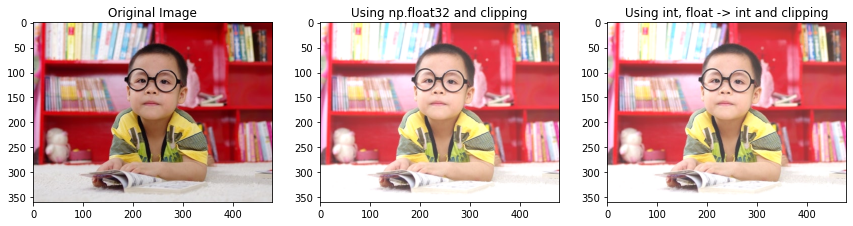

In [101]:
#add the offset for increasing brightness
brightHighFloat32 = np.float32(image) + brightnessOffset
brightHighFloat32NormalizedClipped = np.clip(brightHighFloat32/255, 0, 1)


brightHighFloat32NormalizedClippedUint8 = np.uint8(brightHighFloat32NormalizedClipped*255)

#display the outputs
plt.figure(figsize=[30,30])

plt.subplot(161);
plt.imshow(image[...,::-1]);
plt.title("Original Image");

plt.subplot(162);
plt.imshow(brightHighFloat32NormalizedClipped[...,::-1]);
plt.title("Using np.float32 and clipping");

plt.subplot(163);
plt.imshow(brightHighFloat32NormalizedClippedUint8[...,::-1]);
plt.title("Using int, float -> int and clipping");